In [71]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Load CSV from Google Drive
file_url = "https://drive.google.com/uc?id=1N-ab94SJ8Rh1O7MV0Zi7hJZLrU26oRXf"
df = pd.read_csv(file_url)


# Display first 5 rows
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [73]:
numeric_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col])

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert boolean columns
boolean_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory']
for col in boolean_columns:
    df[col] = df[col].map({'Yes': True, 'No': False})

# Convert frequency columns to numeric
frequency_map = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Very frequently': 3
}

frequency_columns = [col for col in df.columns if 'Frequency' in col]
for col in frequency_columns:
    df[col] = df[col].map(frequency_map)

In [74]:
def display_basic_stats(df):
    """Display basic statistics for numeric columns"""
    print("Basic Statistics:")
    print(df[numeric_columns].describe())
    


In [75]:
def check_missing_values(df):
    """Check for missing values in the dataset"""
    missing = df.isnull().sum()
    print("\nMissing Values:")
    print(missing[missing > 0])
    

In [76]:
def find_outliers(df, columns):
    """Find outliers using IQR method"""
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

In [77]:
# Run basic analysis
print("Dataset Shape:", df.shape)
display_basic_stats(df)
check_missing_values(df)
df.dropna(inplace=True)

Dataset Shape: (736, 33)
Basic Statistics:
              Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  

M

In [78]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [79]:
# Find outliers
def analyze_outliers(df, columns):
    """
    Find outliers and their bounds using IQR method
    Returns a dictionary with bounds and outliers for each column
    """
    outlier_analysis = {}
    
    for col in columns:
        # Calculate quartiles and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        # Store results
        outlier_analysis[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers.to_dict() if not outliers.empty else None
        }
    
    return outlier_analysis


In [80]:
outlier_results = analyze_outliers(df, numeric_columns)

# Display results in a formatted way
for col, analysis in outlier_results.items():
    print(f"\n{'-'*50}")
    print(f"Analysis for {col}:")
    print(f"Q1: {analysis['Q1']:.2f}")
    print(f"Q3: {analysis['Q3']:.2f}")
    print(f"IQR: {analysis['IQR']:.2f}")
    print(f"Lower bound: {analysis['lower_bound']:.2f}")
    print(f"Upper bound: {analysis['upper_bound']:.2f}")
    if analysis['outliers']:
        print("Outliers found:")
        for index, value in analysis['outliers'].items():
            print(f"  - {value:.2f}")
    else:
        print("No outliers detected")


--------------------------------------------------
Analysis for Age:
Q1: 18.00
Q3: 27.00
IQR: 9.00
Lower bound: 4.50
Upper bound: 40.50
Outliers found:
  - 61.00
  - 41.00
  - 43.00
  - 41.00
  - 53.00
  - 41.00
  - 49.00
  - 42.00
  - 60.00
  - 44.00
  - 64.00
  - 53.00
  - 56.00
  - 49.00
  - 59.00
  - 43.00
  - 44.00
  - 57.00
  - 69.00
  - 72.00
  - 73.00
  - 61.00
  - 49.00
  - 41.00
  - 63.00
  - 58.00
  - 58.00
  - 67.00
  - 70.00
  - 60.00
  - 58.00
  - 49.00
  - 55.00
  - 48.00
  - 74.00
  - 60.00
  - 43.00
  - 51.00
  - 63.00
  - 56.00
  - 65.00
  - 42.00
  - 80.00
  - 56.00
  - 57.00
  - 50.00
  - 68.00
  - 53.00
  - 59.00
  - 46.00
  - 56.00
  - 49.00
  - 42.00
  - 42.00
  - 89.00
  - 44.00

--------------------------------------------------
Analysis for Hours per day:
Q1: 2.00
Q3: 5.00
IQR: 3.00
Lower bound: -2.50
Upper bound: 9.50
Outliers found:
  - 12.00
  - 24.00
  - 12.00
  - 12.00
  - 10.00
  - 10.00
  - 10.00
  - 10.00
  - 10.00
  - 10.00
  - 10.00
  - 10.00
  - 10


Changes made in Age:
Original values: [61. 41. 43. 41. 53. 41. 49. 42. 60. 44. 64. 53. 56. 49. 59. 43. 44. 57.
 69. 72. 73. 61. 49. 41. 63. 58. 58. 67. 70. 60. 58. 49. 55. 48. 74. 60.
 43. 51. 63. 56. 65. 42. 80. 56. 57. 50. 68. 53. 59. 46. 56. 49. 42. 42.
 89. 44.]
New values: [40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5]

Changes made in Hours per day:
Original values: [12. 24. 12. 12. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 16. 10. 15. 24.
 14. 12. 10. 10. 10. 15. 10. 10. 10. 12. 12. 10. 12. 12. 11. 10. 24. 18.]
New values: [9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5
 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5 9.5]

Changes made in BPM:
Original values: [2.20000000e+02 0.00000000e+00 2.00000000

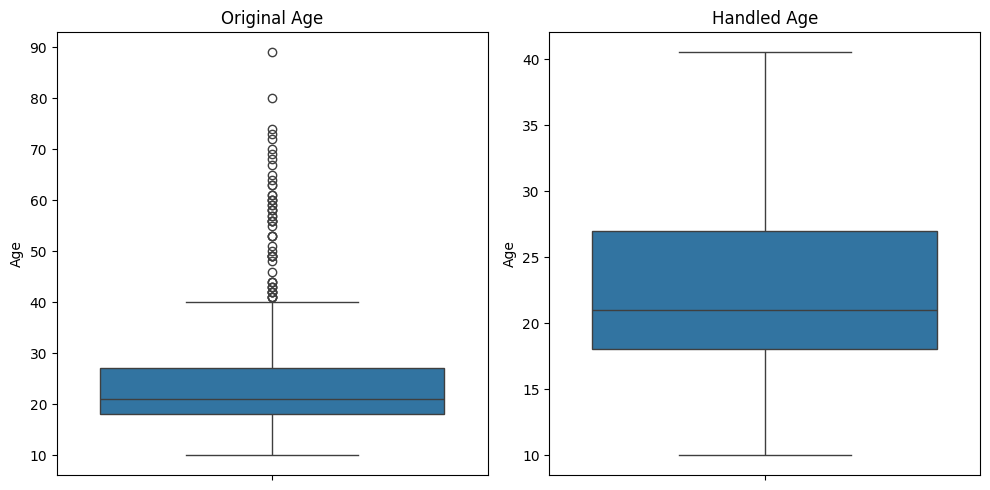


Summary statistics for Age:

Original:
count    616.000000
mean      24.792208
std       11.658515
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       89.000000
Name: Age, dtype: float64

After handling outliers:
count    616.000000
mean      23.448052
std        7.818504
min       10.000000
25%       18.000000
50%       21.000000
75%       27.000000
max       40.500000
Name: Age, dtype: float64


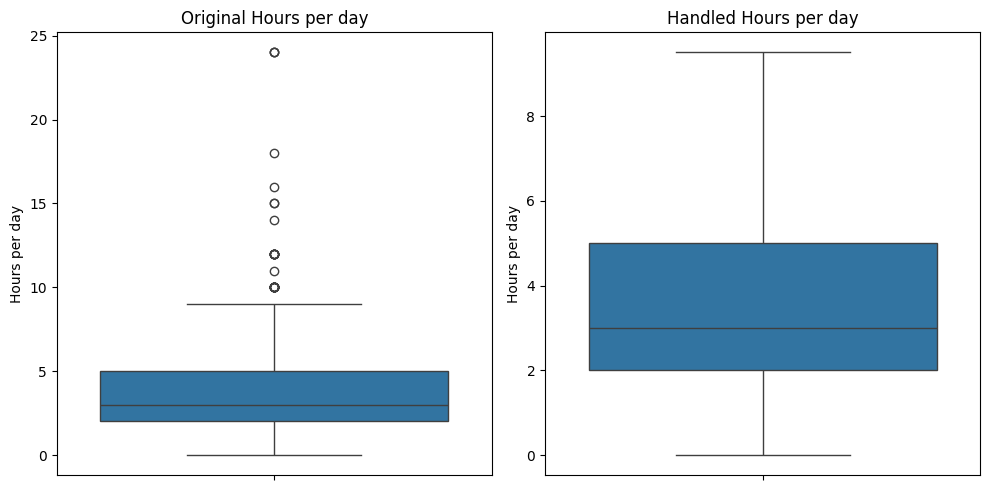


Summary statistics for Hours per day:

Original:
count    616.000000
mean       3.702435
std        3.071961
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

After handling outliers:
count    616.000000
mean       3.531981
std        2.447941
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.500000
Name: Hours per day, dtype: float64


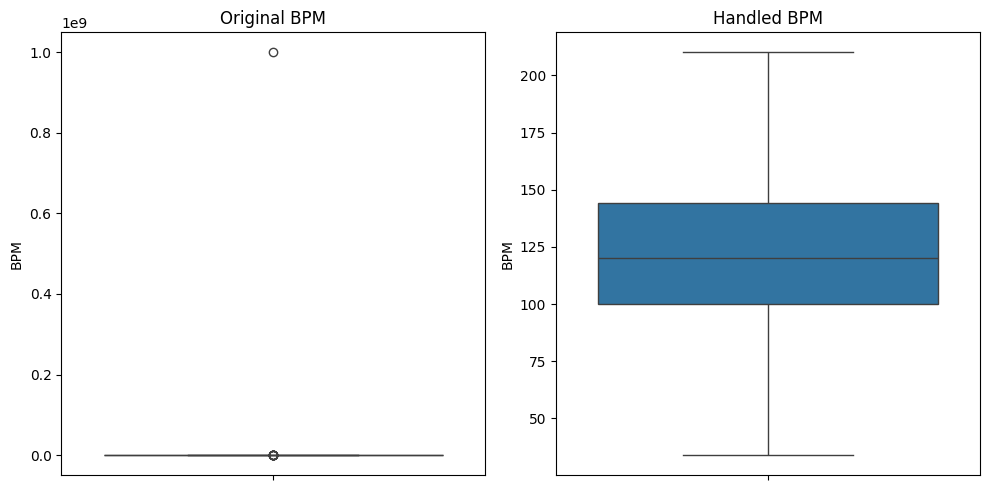


Summary statistics for BPM:

Original:
count    6.160000e+02
mean     1.623500e+06
std      4.029114e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64

After handling outliers:
count    616.000000
mean     123.282468
std       33.403930
min       34.000000
25%      100.000000
50%      120.000000
75%      144.000000
max      210.000000
Name: BPM, dtype: float64


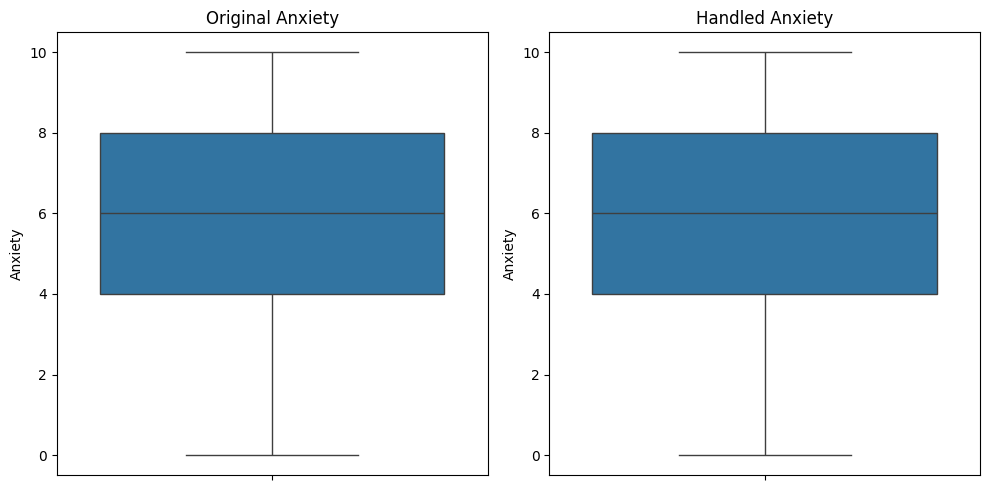


Summary statistics for Anxiety:

Original:
count    616.000000
mean       5.883929
std        2.758269
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Anxiety, dtype: float64

After handling outliers:
count    616.000000
mean       5.883929
std        2.758269
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Anxiety, dtype: float64


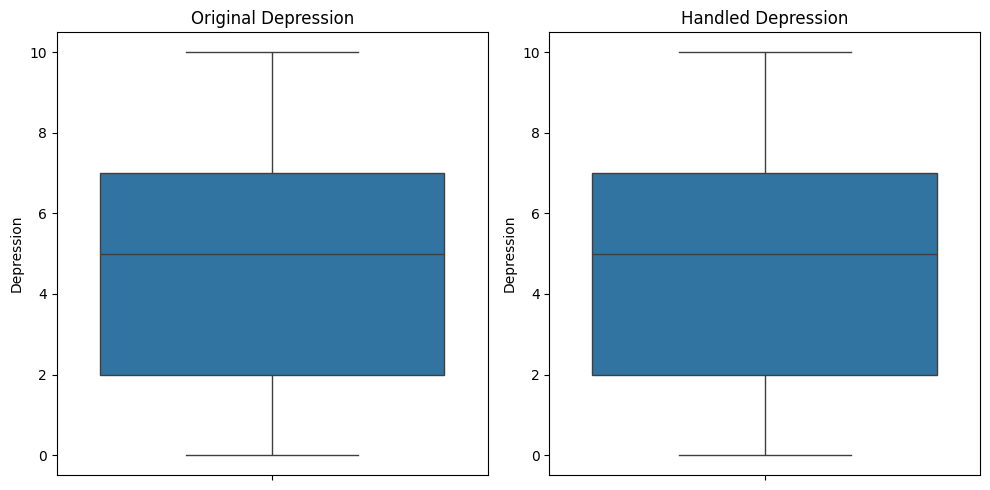


Summary statistics for Depression:

Original:
count    616.000000
mean       4.894481
std        2.998005
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Depression, dtype: float64

After handling outliers:
count    616.000000
mean       4.894481
std        2.998005
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Depression, dtype: float64


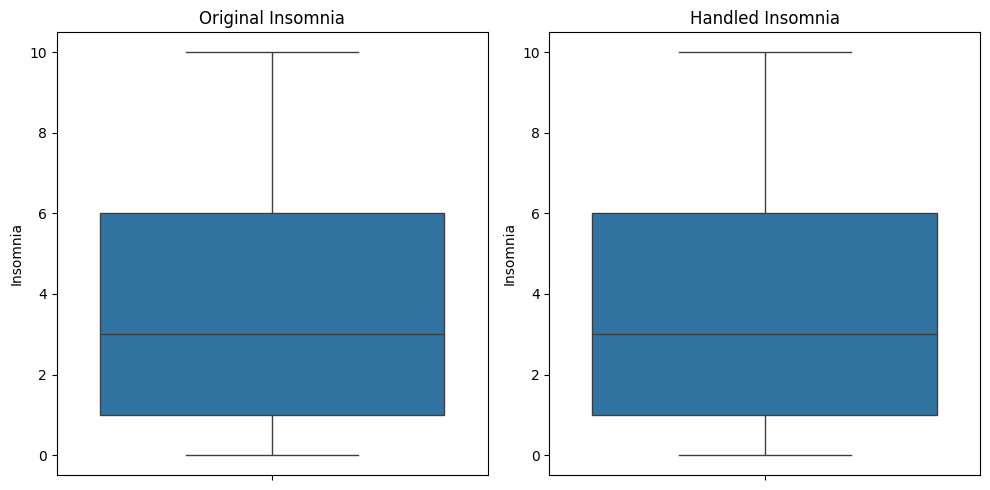


Summary statistics for Insomnia:

Original:
count    616.000000
mean       3.801136
std        3.111972
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: Insomnia, dtype: float64

After handling outliers:
count    616.000000
mean       3.801136
std        3.111972
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       10.000000
Name: Insomnia, dtype: float64


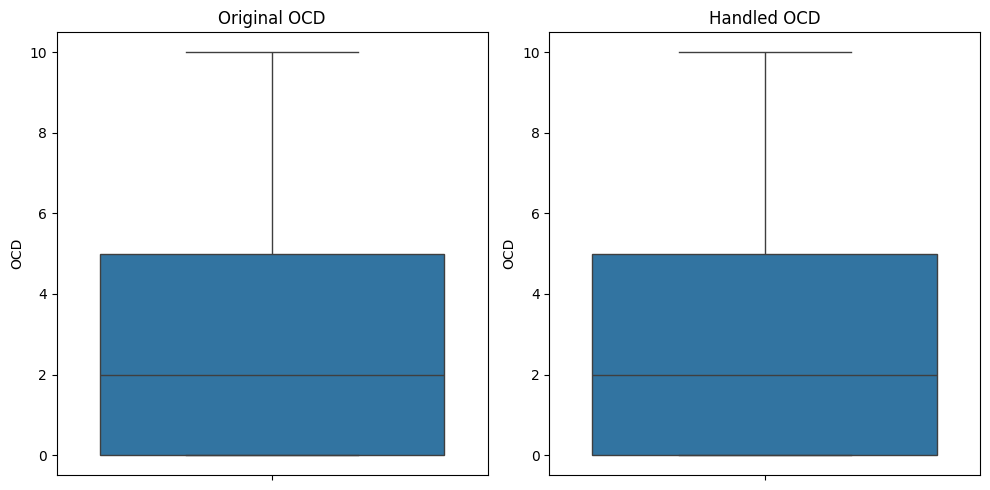


Summary statistics for OCD:

Original:
count    616.000000
mean       2.659091
std        2.857285
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: OCD, dtype: float64

After handling outliers:
count    616.000000
mean       2.659091
std        2.857285
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: OCD, dtype: float64

Impact on Age:
Mean change: -1.34
Std change: -3.84
Range change: -48.50

Impact on Hours per day:
Mean change: -0.17
Std change: -0.62
Range change: -14.50

Impact on BPM:
Mean change: -1623376.72
Std change: -40291109.78
Range change: -999999823.00


In [81]:
def handle_outliers(df, outlier_results, method='winsorize'):
    """
    Handle outliers using specified method
    - winsorize: Cap values at the bounds
    - remove: Remove rows with outliers
    Returns a new dataframe with handled outliers
    """
    df_handled = df.copy()
    
    if method == 'winsorize':
        for col, analysis in outlier_results.items():
            lower = analysis['lower_bound']
            upper = analysis['upper_bound']
            
            # Cap values at the bounds
            df_handled[col] = df_handled[col].clip(lower=lower, upper=upper)
            
            # Print the changes made
            original_values = df[col]
            new_values = df_handled[col]
            changes = original_values != new_values
            if changes.any():
                print(f"\nChanges made in {col}:")
                print(f"Original values: {original_values[changes].values}")
                print(f"New values: {new_values[changes].values}")
    
    elif method == 'remove':
        for col, analysis in outlier_results.items():
            mask = (df[col] >= analysis['lower_bound']) & (df[col] <= analysis['upper_bound'])
            df_handled = df_handled[mask]
            
            if len(df_handled) != len(df):
                print(f"\nRemoved {len(df) - len(df_handled)} rows due to outliers in {col}")
    
    return df_handled

# Handle outliers using winsorization
df_winsorized = handle_outliers(df, outlier_results, method='winsorize')

# Compare original and handled data
def compare_distributions(original_df, handled_df, columns):
    """
    Create visualization comparing original and handled data
    """
    for col in columns:
        plt.figure(figsize=(10, 5))
        
        # Original data
        plt.subplot(1, 2, 1)
        sns.boxplot(y=original_df[col])
        plt.title(f'Original {col}')
        
        # Handled data
        plt.subplot(1, 2, 2)
        sns.boxplot(y=handled_df[col])
        plt.title(f'Handled {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\nSummary statistics for {col}:")
        print("\nOriginal:")
        print(original_df[col].describe())
        print("\nAfter handling outliers:")
        print(handled_df[col].describe())

# Compare distributions
compare_distributions(df, df_winsorized, numeric_columns)

# Calculate the impact of outlier handling
def calculate_impact(original_df, handled_df, columns):
    """
    Calculate the impact of outlier handling on basic statistics
    """
    for col in columns:
        if not (original_df[col] == handled_df[col]).all():
            print(f"\nImpact on {col}:")
            print(f"Mean change: {handled_df[col].mean() - original_df[col].mean():.2f}")
            print(f"Std change: {handled_df[col].std() - original_df[col].std():.2f}")
            print(f"Range change: {handled_df[col].max() - handled_df[col].min() - (original_df[col].max() - original_df[col].min()):.2f}")

calculate_impact(df, df_winsorized, numeric_columns)

# Store the handled dataset in the original variable
df = df_winsorized.copy()


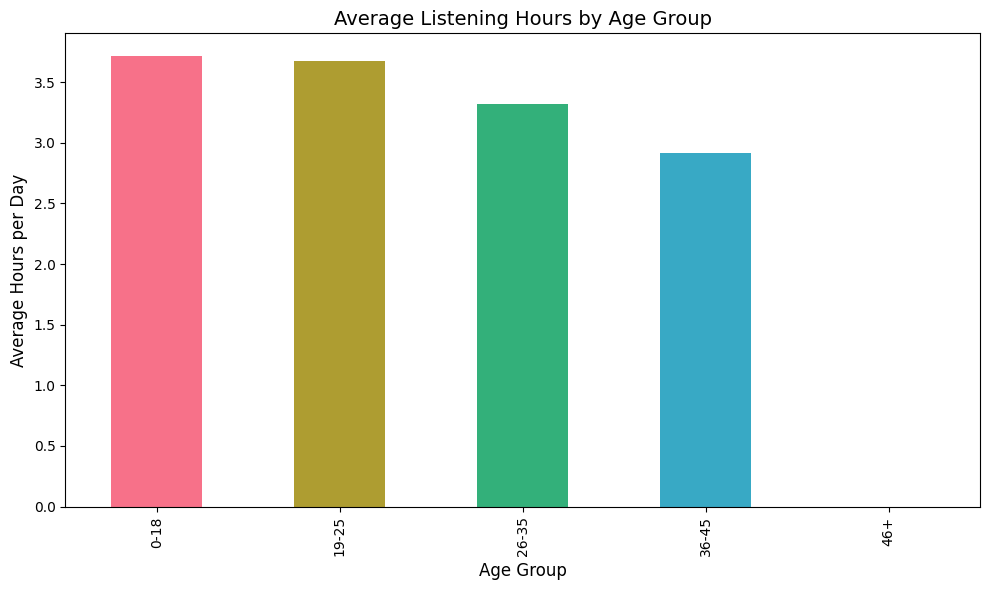

In [82]:
# 3. Age Groups Analysis - Column Chart
plt.figure(figsize=(10, 6))
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 100], labels=['0-18', '19-25', '26-35', '36-45', '46+'])
age_group_stats = df.groupby('Age_Group')['Hours per day'].mean()
age_group_stats.plot(kind='bar', color=sns.color_palette("husl", len(age_group_stats)))
plt.title('Average Listening Hours by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Hours per Day', fontsize=12)
plt.tight_layout()
plt.show()

## Doughnut Chart
### Insights: 
This doughnut chart displays the distribution of favorite music genres among the users. The size of each slice represents the proportion of users who prefer a particular genre. This visualization helps identify the most popular and least popular genres. For example, if Latin and Rock are the most prominent slices, it indicates that these genres are highly favored by the users.

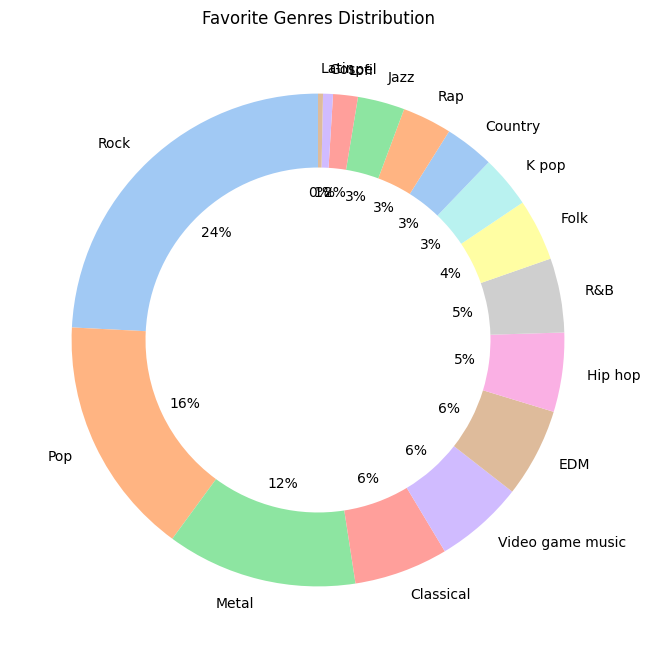

In [83]:
# Plot Doughnut Chart for Favorite Genres
fav_genre_counts = df['Fav genre'].value_counts()
colors = sns.color_palette('pastel')[0:len(fav_genre_counts)]

plt.figure(figsize=(8, 8))
plt.pie(fav_genre_counts, labels=fav_genre_counts.index, colors=colors, autopct='%.0f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Favorite Genres Distribution')
plt.show()

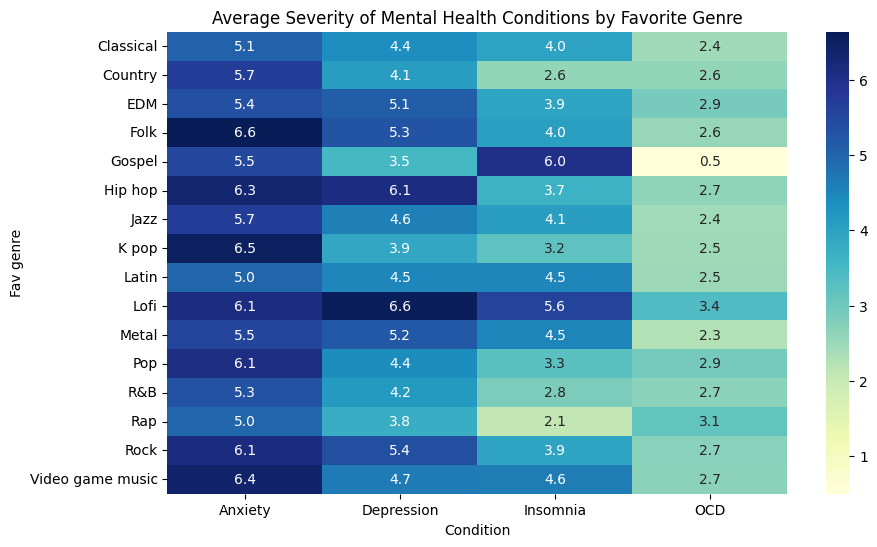

In [84]:
# Plot Music Effects and Mental Health (Heatmap)
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df_mh = df.melt(id_vars=['Age', 'Fav genre'], value_vars=mental_health_columns, var_name='Condition', value_name='Severity')

pivot_table = df_mh.pivot_table(index='Fav genre', columns='Condition', values='Severity', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Severity of Mental Health Conditions by Favorite Genre')
plt.show()

## Music Effects and Mental Health (Heatmap)
From this data, we can gain valuable insights into how different music genres are associated with various mental health conditions:

Classical and Gospel: These genres are generally associated with lower scores for anxiety, depression, and OCD, suggesting their calming and therapeutic effects. However, Gospel music has a higher score for insomnia.

EDM and Hip Hop: These genres show higher scores for anxiety and depression, indicating a potential link between the high-energy, intense nature of the music and these mental health issues. Both genres also exhibit moderate scores for insomnia and OCD.

Lofi and K-pop: These genres have some of the highest scores for anxiety, depression, insomnia, and OCD, indicating a significant impact on mental health conditions. Lofi, in particular, has very high scores across all conditions.

Metal and Rock: Both genres are associated with higher scores for anxiety and depression, indicating their potential influence on mental health. Metal also shows high scores for insomnia, while Rock shows moderate scores for OCD.

Pop and R&B: These genres have moderate scores across all health conditions, suggesting a balanced influence on mental health. Pop shows higher scores for anxiety and depression, while R&B has relatively lower scores.

Folk and Country: Folk music shows higher scores for anxiety and depression, but lower scores for OCD. Country music shows moderate scores for anxiety and depression, with lower scores for insomnia and OCD.

Jazz and Latin: Jazz has moderate scores for anxiety and depression, with relatively low scores for insomnia and OCD. Latin music shows lower scores across all conditions, indicating its positive impact on mental health.

Video Game Music: This genre has moderate scores for anxiety, depression, and insomnia, indicating its influence on mental health. However, it shows lower scores for OCD.

These insights highlight the complex and varied impact of different music genres on mental health conditions. They provide valuable information for developing targeted music therapy and wellness programs to address specific mental health issues.

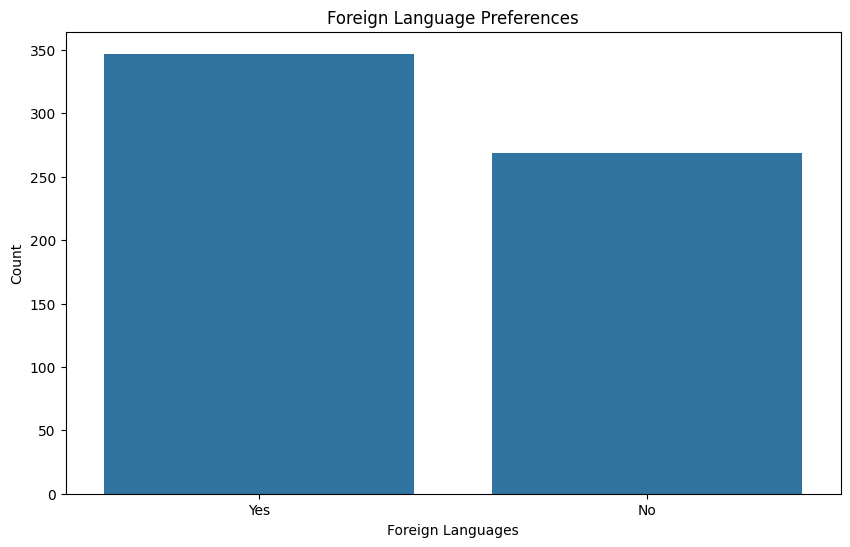

In [85]:
# Count Plot for Foreign Language Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Foreign languages')
plt.title('Foreign Language Preferences')
plt.xlabel('Foreign Languages')
plt.ylabel('Count')
plt.show()

## Count Plot for Foreign Language Preferences:

#### Insights:
This count plot shows the distribution of users who prefer music in foreign languages versus those who do not. It provides insights into the linguistic diversity of music preferences among the users. For example, if a significant portion of users prefer foreign languages, it suggests a high level of openness to diverse musical cultures.

<Figure size 1200x800 with 0 Axes>

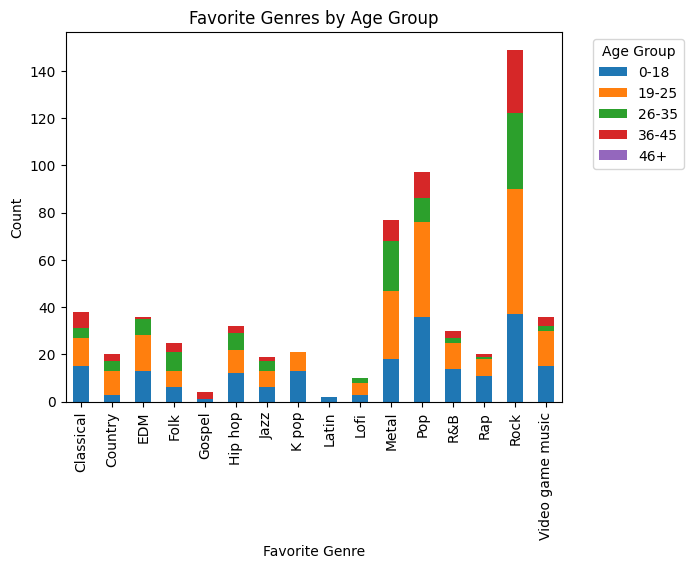

In [86]:

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 100], labels=['0-18', '19-25', '26-35', '36-45', '46+'])

# Count the number of users for each favorite genre by age group
genre_counts = df.groupby(['Fav genre', 'Age Group']).size().unstack().fillna(0)

# Plot the counts
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', stacked=True)
plt.title('Favorite Genres by Age Group')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


## Favorite Genres by Age Group
From this data, we can draw several key insights about music preferences across different age groups:

Pop and Rock Dominance: Pop and Rock are the most popular genres across all age groups. Rock has a particularly strong following in the 19-25 and 26-35 age groups (62 and 42 users, respectively), while Pop is highly favored among the 0-18 and 19-25 age groups (43 and 47 users, respectively).

Age-Specific Preferences: Younger age groups (0-18 and 19-25) show a diverse range of musical preferences with notable numbers in genres like Classical, EDM, Hip hop, K-pop, Metal, and Video game music. The 0-18 age group, for instance, shows a significant interest in K-pop (15 users) and Metal (18 users), while the 19-25 age group has a notable preference for Metal (35 users).

Genre Preferences among Older Age Groups: The 26-35 and 36-45 age groups also display a variety of musical tastes. However, the numbers are generally lower compared to the younger groups. Genres like Rock, Folk, and Gospel have a presence in the 36-45 age group, with Rock being particularly prominent.

Niche Genres: Some genres have lower overall counts but still maintain a presence in specific age groups. For example, genres like Gospel and Latin have fewer followers, but Gospel is notably present in the 36-45 age group (5 users), and Latin is favored by the 0-18 age group (3 users).

Minimal Representation: The 46+ age group shows no users for any genre, which could suggest a gap in data collection or a preference for traditional music listening methods that are not captured in this dataset.

Classical Music: Classical music has a consistent but moderate following across all age groups except the 46+ group, indicating its timeless appeal.

These insights highlight the varying musical preferences across different age groups and can inform targeted music recommendations, marketing strategies, and further research into age-specific musical trends.

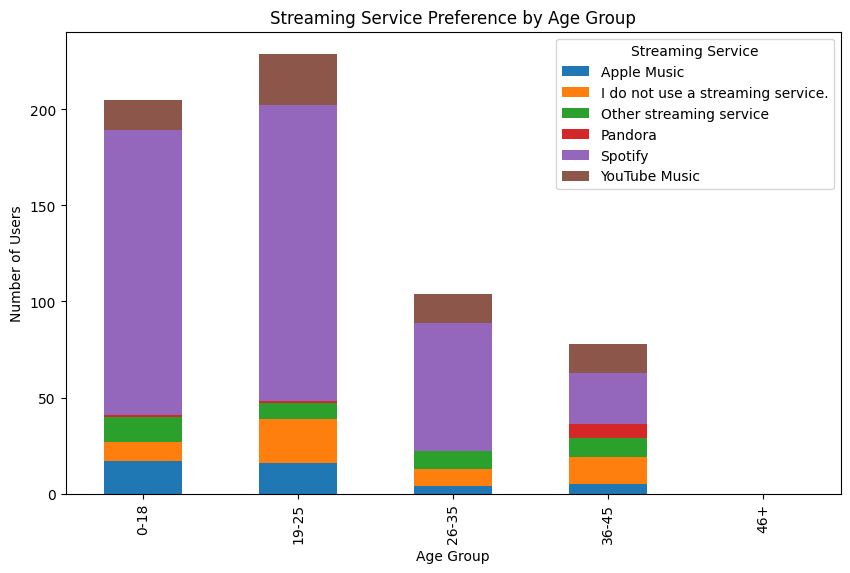

In [87]:
# Analyze Streaming Service Preference
streaming_service_preference = df.groupby('Age Group')['Primary streaming service'].value_counts().unstack().fillna(0)

# Streaming Service Preference Visualization
streaming_service_preference.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Streaming Service Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Streaming Service')
plt.show()

## Streaming Service Preference Visualization
Analyzing the primary streaming service preferences by age group provides several key insights. Spotify is the most popular streaming service across all age groups, with a significant lead, particularly in the 0-18 (168 users) and 19-25 (175 users) age groups. YouTube Music also has a notable presence in these younger age groups, with 24 and 35 users, respectively. Apple Music is used relatively consistently across all age groups, but its user base is much smaller compared to Spotify. The category "I do not use a streaming service" is most prevalent in the 19-25 and 36-45 age groups, with 29 and 20 users, respectively, indicating a notable portion of these age groups prefers other means of accessing music. The "Other streaming service" category remains consistently low across all age groups. Pandora has very few users, and it's only present in the 36-45 age group, with 8 users. It's also interesting to note that there are no reported users in the 46+ age group for any streaming service, suggesting a gap in data or a preference for traditional music listening methods in this demographic. Overall, these insights highlight Spotify's dominance among younger users and the varying degrees of streaming service adoption across age groups.

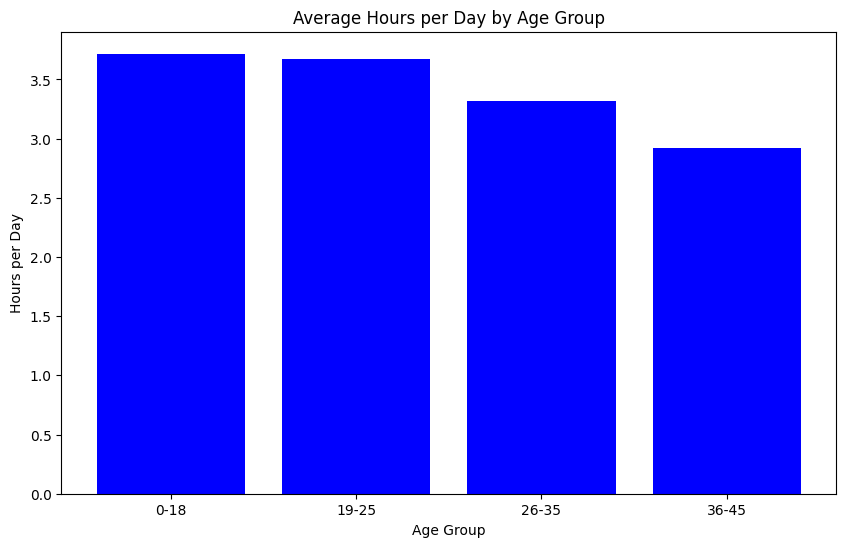

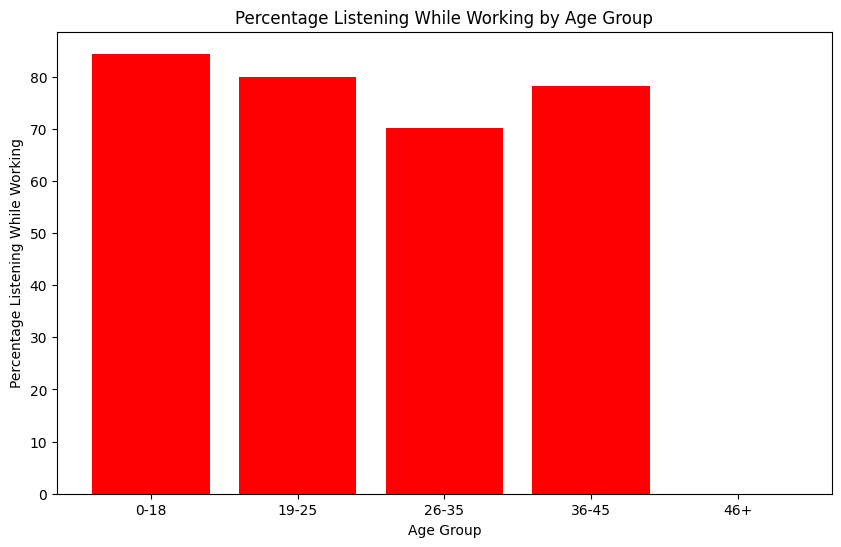

In [88]:
# Analyze Listening Habits
listening_habits = df.groupby('Age Group').agg({
    'Hours per day': 'mean',
    'While working': lambda x: x.value_counts(normalize=True).get(True, 0) * 100
}).reset_index()

# Bar Chart for Hours per Day
plt.figure(figsize=(10, 6))
plt.bar(listening_habits['Age Group'], listening_habits['Hours per day'], color='b')
plt.xlabel('Age Group')
plt.ylabel('Hours per Day')
plt.title('Average Hours per Day by Age Group')
plt.show()

# Bar Chart for Percentage Listening While Working
plt.figure(figsize=(10, 6))
plt.bar(listening_habits['Age Group'], listening_habits['While working'], color='r')
plt.xlabel('Age Group')
plt.ylabel('Percentage Listening While Working')
plt.title('Percentage Listening While Working by Age Group')
plt.show()

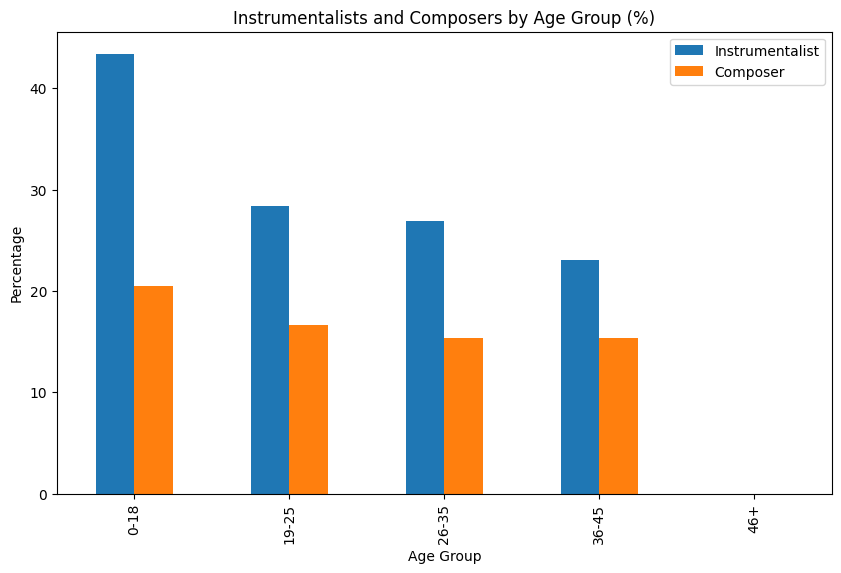

In [89]:
# Analyze Instrumentalists and Composers
instrumentalists_and_composers = df.groupby('Age Group').agg({
    'Instrumentalist': lambda x: x.value_counts(normalize=True).get(True, 0) * 100,
    'Composer': lambda x: x.value_counts(normalize=True).get(True, 0) * 100
})

# Instrumentalists and Composers Visualization
instrumentalists_and_composers.plot(kind='bar', figsize=(10, 6))
plt.title('Instrumentalists and Composers by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

## Instrumentalists and Composers Visualization
The data on instrumentalists and composers by age group provides several interesting insights. The age group 0-18 has the highest percentage of instrumentalists (43.83%) and a notable percentage of composers (22.27%), indicating that younger individuals are highly engaged in music creation and performance. This trend decreases with age, with the 19-25 age group showing a drop to 29.63% for instrumentalists and 15.19% for composers. The decline continues in the 26-35 and 36-45 age groups, with instrumentalists at 25.58% and 19.59%, and composers at 13.18% and 15.46%, respectively. Notably, there are no instrumentalists or composers reported in the 46+ age group. This data suggests that musical engagement in terms of performing and composing tends to decrease with age. These insights could be valuable for music education programs, indicating a strong interest in music among younger individuals that could be nurtured and maintained through appropriate support and opportunities.

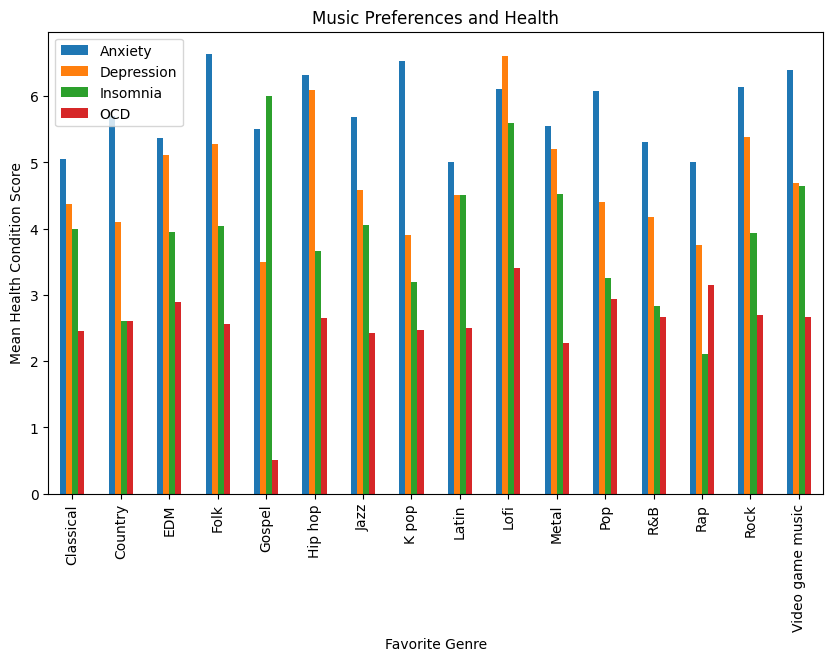

In [90]:
# Analyze Music Preferences and Health
music_preferences_and_health = df.groupby('Fav genre').agg({
    'Anxiety': 'mean',
    'Depression': 'mean',
    'Insomnia': 'mean',
    'OCD': 'mean'
})

# Music Preferences and Health Visualization
music_preferences_and_health.plot(kind='bar', figsize=(10, 6))
plt.title('Music Preferences and Health')
plt.xlabel('Favorite Genre')
plt.ylabel('Mean Health Condition Score')
plt.show()

# Insights from Music Preferences and Health Visualization 
From this data, we can draw some fascinating insights into the relationship between music preferences and health conditions:

Classical and Jazz: These genres have relatively lower scores for anxiety, depression, and insomnia, suggesting their calming and therapeutic effects on listeners. However, Jazz shows slightly higher scores for OCD compared to Classical.

EDM and Hip Hop: These genres have higher scores for anxiety and depression, indicating a potential link between the intense, fast-paced nature of the music and these mental health issues. Both genres also show moderate scores for insomnia and OCD.

Gospel: This genre stands out with low scores for anxiety, depression, and OCD, suggesting that it may have a positive impact on listeners' mental health. However, it has a higher score for insomnia.

Lofi and K-pop: These genres have some of the highest scores for depression, insomnia, and OCD, suggesting a significant impact on mental health conditions.

Country and Folk: Country music shows a moderate score for anxiety and depression but lower scores for insomnia and OCD. Folk music, on the other hand, shows higher scores for anxiety and depression but lower scores for OCD.

Metal and Rock: Both genres show higher scores for anxiety and depression, indicating their potential influence on mental health. Rock also has high scores for insomnia and OCD, while Metal shows a moderate influence.

Pop and R&B: These genres have moderate scores across all health conditions, suggesting a balanced influence on mental health.

Video Game Music: This genre has moderate scores for anxiety, depression, and insomnia, indicating its potential influence on mental health. However, it shows lower scores for OCD.

These insights highlight the complex and varied impact of different music genres on mental health conditions, providing valuable information for developing targeted music therapy and wellness programs.

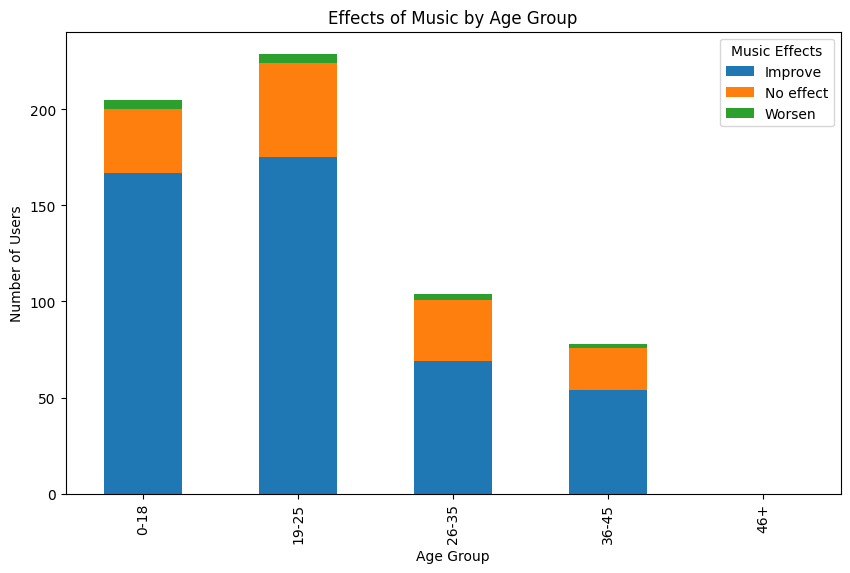

In [91]:

# Analyze Effects of Music
effects_of_music = df.groupby('Age Group')['Music effects'].value_counts().unstack().fillna(0)

# Effects of Music Visualization
ax = effects_of_music.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Effects of Music by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')

# Update legend labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [label.replace('Music effects', '').strip() for label in labels]
ax.legend(handles, new_labels, title='Music Effects')

plt.show()


## Effects of Music for different age groups
Analyzing the effects of music by age group provides several interesting insights. For the age group 0-18, the majority (189) of individuals reported an improvement in their state, with only a small number (41) experiencing no effect and even fewer (6) reporting a worsening effect. The 19-25 age group shows a similar pattern, with a significant number (203) reporting improvement, some (58) experiencing no effect, and a very small number (6) feeling worse. As we move to older age groups, the number of people reporting improvements decreases: 82 in the 26-35 group and 67 in the 36-45 group. Additionally, the instances of music having no effect or worsening decrease as well. Interestingly, there are no reports from individuals aged 46 and above. This data suggests that younger age groups tend to experience more significant positive effects from music, which might be leveraged for mental health interventions tailored to younger demographics. It also highlights a potential gap in data for older age groups, which could be explored further. Overall, these insights reveal the powerful and predominantly positive impact of music on younger individuals.

In [92]:
from sqlalchemy import create_engine

In [93]:
df.to_csv('cleaned_mxmh.csv', index=False)

In [94]:
# from sqlalchemy import create_engine
# import urllib.parse

# # Replace with your MySQL credentials
# username = 'root'
# password = urllib.parse.quote_plus("Asnair@99")
# host = 'localhost:3306'
# database_name = 'b42_constructweek'


# # Create the SQLAlchemy engine
# engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database_name}")

# # Test the connection
# try:
#     conn = engine.connect()
#     print("Connection successful!")
#     conn.close()
# except Exception as e:
#     print(f"Connection failed: {e}")
